# 0.0 IMPORTS

In [90]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import sys

# Visualization Tools
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
# from PIL import Image
from IPython.core.display  import HTML
from IPython.display import display
# import sweetviz as sv

#!{sys.executable} -m pip install pandas-profiling
# from pandas_profiling import ProfileReport

import warnings

import warnings
warnings.filterwarnings( 'ignore' )


## 0.1. Helper Functions

In [91]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    # configura o pandas para quantidade de casas decimais
    pd.set_option('display.float_format', lambda x: '%.4f' % x)

    sns.set()
jupyter_settings()

## 0.2. Loading data


In [92]:
df_raw = pd.read_csv('Country-data.csv', low_memory=False)

# 1.0 DATA DESCRIPTION

In [93]:
df1 = df_raw.copy()

In [94]:
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [95]:
df.shape

(167, 10)

In [96]:
df1.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## 1.1. Data Dimensions

In [97]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 167
Number of Columns: 10


## 1.2. Data Types

In [98]:
df1.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

## 1.3. Check NA

In [99]:
df1.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## 1.4. Fillout NA

## 1.5. Descriptive Statistical

In [100]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.5.1 Numerical Attributes

In [101]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T


# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x:x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x:x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x:x.kurtosis())).T

# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,child_mort,2.6000,208.0000,205.4000,38.2701,19.3000,40.2080,1.4508,1.7669
1,exports,0.1090,200.0000,199.8910,41.1090,35.0000,27.3298,2.4458,10.1387
2,health,1.8100,17.9000,16.0900,6.8157,6.3200,2.7386,0.7057,0.6942
3,imports,0.0659,174.0000,173.9341,46.8902,43.3000,24.1370,1.9053,6.7559
4,income,609.0000,125000.0000,124391.0000,17144.6886,9960.0000,19220.2623,2.2315,7.0287
5,inflation,-4.2100,104.0000,108.2100,7.7818,5.3900,10.5390,5.1540,41.7425
6,life_expec,32.1000,82.8000,50.7000,70.5557,73.1000,8.8665,-0.9710,1.1516
7,total_fer,1.1500,7.4900,6.3400,2.9480,2.4100,1.5093,0.9671,-0.1868
8,gdpp,231.0000,105000.0000,104769.0000,12964.1557,4660.0000,18273.7460,2.2181,5.5279


### 1.5.2 Categorical Attributes

In [102]:
cat_attributes.apply(lambda x: x.unique().shape[0])

country    167
dtype: int64

# 2.0. FEATURE ENGINEERING

In [139]:
df2 = df1.copy()

In [141]:
import continentes
print(continentes.continentes)
df2['continent'] = df2['country'].map(continentes.continentes)

{'Afghanistan': 'Ásia', 'Albania': 'Europa', 'Algeria': 'África', 'Andorra': 'Europa', 'Angola': 'África', 'Antigua and Barbuda': 'América do Norte', 'Argentina': 'América do Sul', 'Armenia': 'Europa', 'Australia': 'Oceania', 'Austria': 'Europa', 'Azerbaijan': 'Europa', 'Bahamas': 'América do Norte', 'Bahrain': 'Ásia', 'Bangladesh': 'Ásia', 'Barbados': 'América do Norte', 'Belarus': 'Europa', 'Belgium': 'Europa', 'Belize': 'América Central', 'Benin': 'África', 'Bhutan': 'Ásia', 'Bolivia': 'América do Sul', 'Bosnia and Herzegovina': 'Europa', 'Botswana': 'África', 'Brazil': 'América do Sul', 'Brunei': 'Ásia', 'Bulgaria': 'Europa', 'Burkina Faso': 'África', 'Burundi': 'África', 'Cabo Verde': 'África', 'Cambodia': 'Ásia', 'Cameroon': 'África', 'Canada': 'América do Norte', 'Central African Republic': 'África', 'Chad': 'África', 'Chile': 'América do Sul', 'China': 'Ásia', 'Colombia': 'América do Sul', 'Comoros': 'África', 'Congo, Dem. Rep.': 'África', 'Congo, Rep.': 'África', 'Costa Rica':

In [142]:
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continente
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553,Ásia
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090,Europa
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460,África
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530,África
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200,América do Norte


In [143]:
df2['continente'].value_counts()

continente
África              46
Europa              42
Ásia                40
América do Sul      12
América do Norte     9
Oceania              9
América Central      5
Name: count, dtype: int64

# 3.0. EXPLORATORY DATA ANALYSIS

In [147]:
df3 = df2.copy()

In [149]:
df3.head(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continente
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553,Ásia
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090,Europa
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460,África
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530,África
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200,América do Norte
5,Argentina,14.5000,18.9000,8.1000,16.0000,18700,20.9000,75.8000,2.3700,10300,América do Sul
6,Armenia,18.1000,20.8000,4.4000,45.3000,6700,7.7700,73.3000,1.6900,3220,Europa
7,Australia,4.8000,19.8000,8.7300,20.9000,41400,1.1600,82.0000,1.9300,51900,Oceania
8,Austria,4.3000,51.3000,11.0000,47.8000,43200,0.8730,80.5000,1.4400,46900,Europa
9,Azerbaijan,39.2000,54.3000,5.8800,20.7000,16000,13.8000,69.1000,1.9200,5840,Europa


## 3.1. Univariate Analysis

### 3.1.1. Numerical Variable

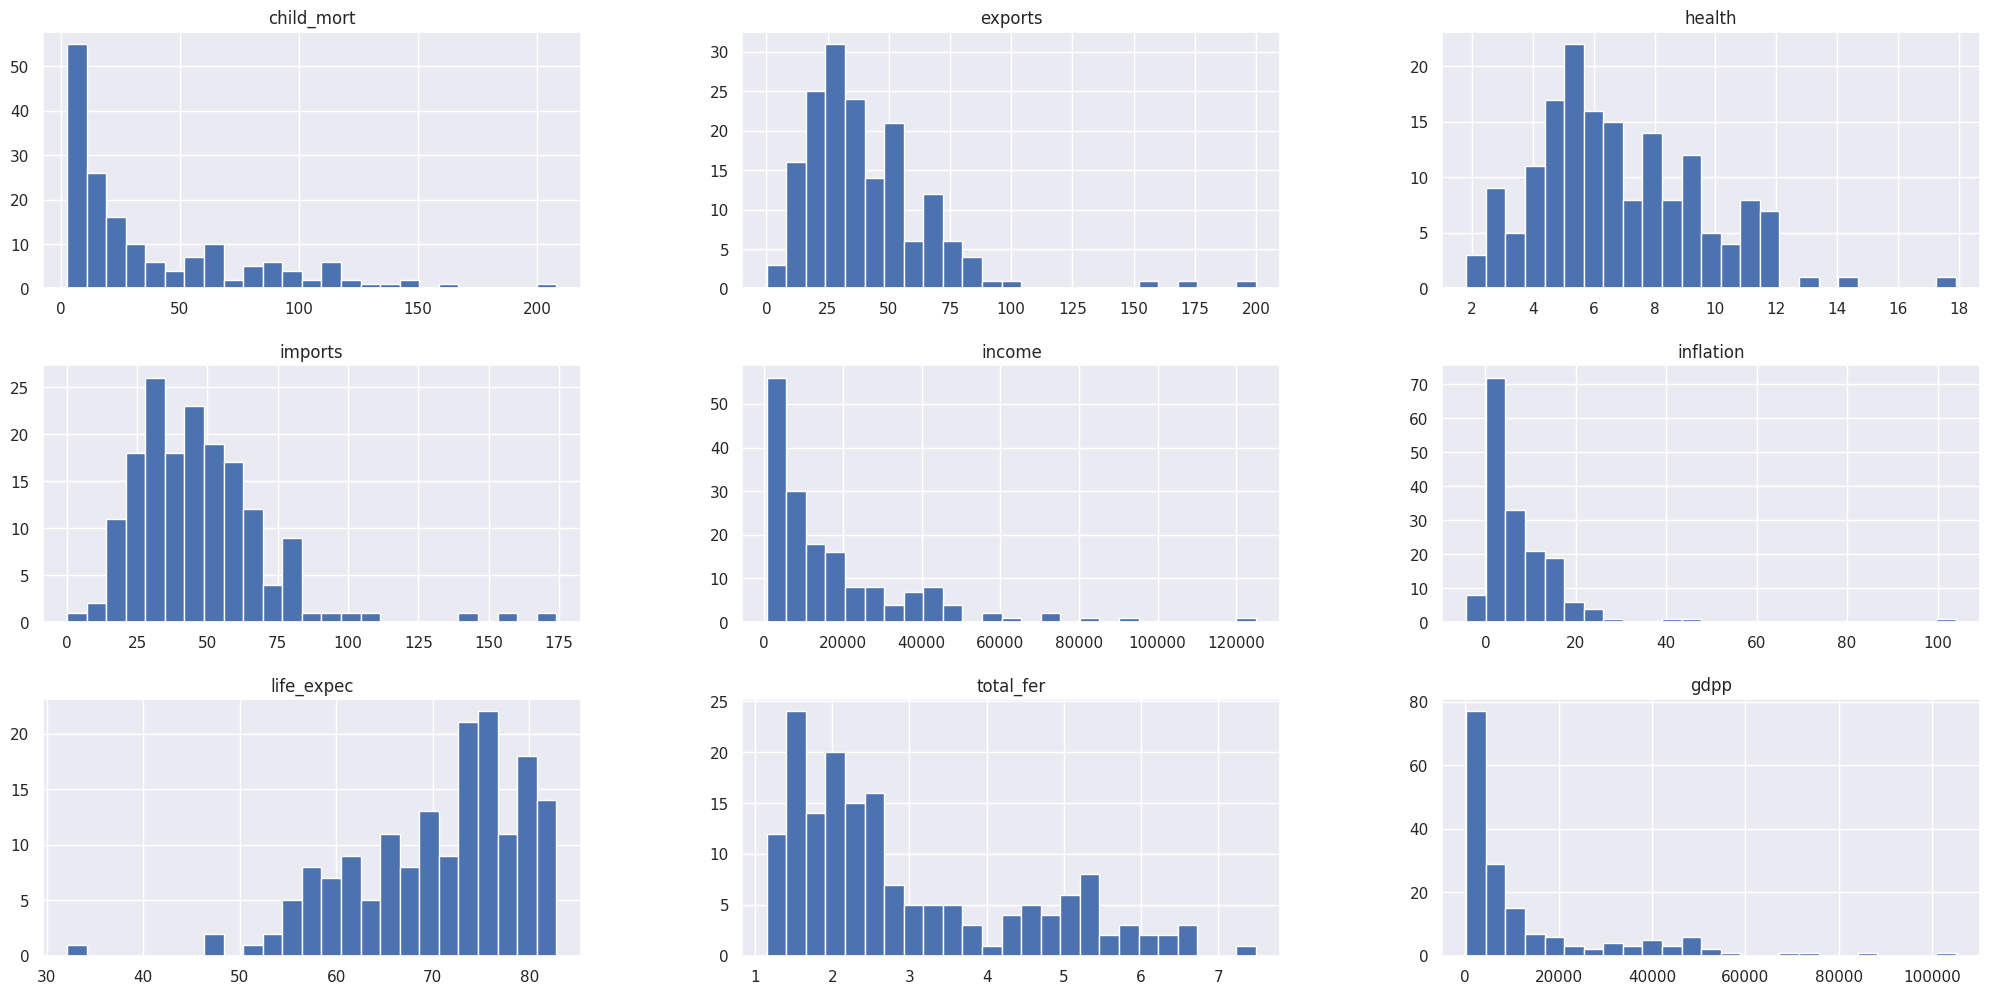

In [121]:
num_attributes.hist(bins=25);